This notebook focuses on a data analysis and machine learning approach to explore the workplace employment landscape of Wales in different industries from 2009 to 2018. The [employment data](https://statswales.gov.wales/Catalogue/Business-Economy-and-Labour-Market/People-and-Work/Employment/Jobs/Whole-Workforce/workplaceemployment-by-industry-area) of wales from StatsWales is used as data source. The data source contains various data including workplace employment estimates, or estimates of total jobs, for Wales and its NUTS2 areas, along with comparable UK data disaggregated by industry section. 

In this notebook we will only explore Wales data from 2009 to 2018 for our analysis.

In [1]:
## importing necessary packages

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from scipy.cluster import hierarchy
from scipy import stats
import seaborn as sns

py.init_notebook_mode(connected=True)
import plotly.express as px

%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

## Data Preprocessing 

Different years data from StatsWales data source is downloaded in EXCEL format and named after years. First we will read 2009 Wales employment data of different industries from StatsWales.

In [2]:
data_2009 = pd.read_excel("2009.xlsx")
data_2009

,Unnamed: 0,Unnamed: 1,United Kingdom,Wales,.,Wales .1
0,NaN,NaN,NaN,West Wales and the Valleys,East Wales,.
1,All industries,NaN,29966500.0,783400,552900,1336300
2,All industries,"Agriculture, forestry and fishing",389600.0,25700,12000,37700
3,NaN,Production,2832800.0,90200,66600,156700
4,NaN,Construction,2169500.0,60700,35900,96600
5,NaN,"Wholesale, retail, transport, hotels and food",7899000.0,207700,137700,345400
6,NaN,Information and communication,1153800.0,12900,14900,27800
7,NaN,Finance and insurance activities,1089300.0,13900,19800,33800
8,NaN,Real estate activities,465500.0,7100,6500,13500
9,NaN,"Professional, scientific and technical activit...",4572800.0,72400,72500,144800


<IPython.core.display.Javascript object>

We can see that there are so many garbage data in the dataframe that we do not need for our analysis. We will clean the downloaded every year data in next few steps and them in a single dataframe.

In [3]:
data_2009 = pd.read_excel("2009.xlsx", skiprows=2)
data_2009

,All industries,Unnamed: 1,29966500,783400,552900,1336300
0,All industries,"Agriculture, forestry and fishing",389600,25700,12000,37700
1,NaN,Production,2832800,90200,66600,156700
2,NaN,Construction,2169500,60700,35900,96600
3,NaN,"Wholesale, retail, transport, hotels and food",7899000,207700,137700,345400
4,NaN,Information and communication,1153800,12900,14900,27800
5,NaN,Finance and insurance activities,1089300,13900,19800,33800
6,NaN,Real estate activities,465500,7100,6500,13500
7,NaN,"Professional, scientific and technical activit...",4572800,72400,72500,144800
8,NaN,"Public administration, defence, education and ...",7739900,255700,160000,415600
9,NaN,Other service activities,1654600,37000,27200,64200


<IPython.core.display.Javascript object>

In [4]:
data_2009.columns = ["temp", "Industry", "All", "West Wales", "East Wales", "2009"]
dataframe = data_2009.drop(["temp", "All", "West Wales", "East Wales"], axis=1)
dataframe

,Industry,2009
0,"Agriculture, forestry and fishing",37700
1,Production,156700
2,Construction,96600
3,"Wholesale, retail, transport, hotels and food",345400
4,Information and communication,27800
5,Finance and insurance activities,33800
6,Real estate activities,13500
7,"Professional, scientific and technical activit...",144800
8,"Public administration, defence, education and ...",415600
9,Other service activities,64200


<IPython.core.display.Javascript object>

We now have a dataframe containing industry names and data from 2009. We want to do the same for every other dataset to clean the data and merge them in one dataframe.

In [5]:
filenames = [
    "2009.xlsx",
    "2010.xlsx",
    "2011.xlsx",
    "2012.xlsx",
    "2013.xlsx",
    "2014.xlsx",
    "2015.xlsx",
    "2016.xlsx",
    "2017.xlsx",
    "2018.xlsx",
]
years_ = [
    "2009",
    "2010",
    "2011",
    "2012",
    "2013",
    "2014",
    "2015",
    "2016",
    "2017",
    "2018",
]
for year, file in zip(years_[1:], filenames[1:]):
    df_ = pd.read_excel(file, skiprows=2)
    df_.columns = ["temp", "Industry", "All", "West Wales", "East Wales", year]
    dataframe[year] = df_[year]

dataframe

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Agriculture, forestry and fishing",37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
1,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
2,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
3,"Wholesale, retail, transport, hotels and food",345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
4,Information and communication,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
5,Finance and insurance activities,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
6,Real estate activities,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
7,"Professional, scientific and technical activit...",144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
8,"Public administration, defence, education and ...",415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
9,Other service activities,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


<IPython.core.display.Javascript object>

We have a dataframe with industry names and corresponding employment data for every year from 2009 to 2018 but the industry names are too long and that is not convenient. We will rename the industry names for convenience and save a copy of our dataframe.

In [6]:
industries_ = [
    "Agriculture",
    "Production",
    "Construction",
    "Retail",
    "ICT",
    "Finance",
    "Real_Estate",
    "Professional_Service",
    "Public_Adminstration ",
    "Other_Service",
]
dataframe["Industry"] = industries_
dataframe.set_index("Industry", inplace=True)
dataframe.to_csv("employment_data.csv")
dataframe = pd.read_csv("employment_data.csv")
dataframe

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
1,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
2,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
3,Retail,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
4,ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
5,Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
6,Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
7,Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
8,Public_Adminstration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
9,Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


<IPython.core.display.Javascript object>

We now have a clean data frame. Next we want to check if there's any null values in the dataset. If any null values are found we will replace it with mean values.

In [7]:
data = dataframe.copy()
data.isnull()

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


<IPython.core.display.Javascript object>

There's no null values in dataset. Next we will check for ouliers in the dataset and if there's any outlier we will replace it with mean values. To find outliers we will calculate **zscore** in the dataset. Generally, if **zscore** is less then **-3** or bigger then **+3** then it is taken as an outlier. 

In [8]:
z_score = np.abs(stats.zscore(data.drop("Industry", axis=1)))
np.where(z_score > 3)

(array([], dtype=int64), array([], dtype=int64))

<IPython.core.display.Javascript object>

We can see that there's no oulier as well in the dataset.

# Data Analysis

In this section, we will do some data analysis to answer some questions from the data. First, we want to know about **which industry employed highest and lowest workers over the period**.

To do this we take sum over all years for every industry data and make a new column called total employee in the dataframe.

In [9]:
data = dataframe.copy()
data.set_index("Industry")

total_employee = []
columns = data["Industry"][:]

for column in columns:
    employee = float(data.loc[data["Industry"] == column].sum(axis=1))
    total_employee.append(employee)

data["Total employee"] = total_employee
data

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total employee
0,Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100,392800.0
1,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700,1622600.0
2,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800,945300.0
3,Retail,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600,3461700.0
4,ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500,320700.0
5,Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500,322100.0
6,Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200,189900.0
7,Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100,1565200.0
8,Public_Adminstration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900,4236500.0
9,Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800,740800.0


<IPython.core.display.Javascript object>

We have highest and lowest workers for each industry over the period in numbers. We will plot it for visualizations.

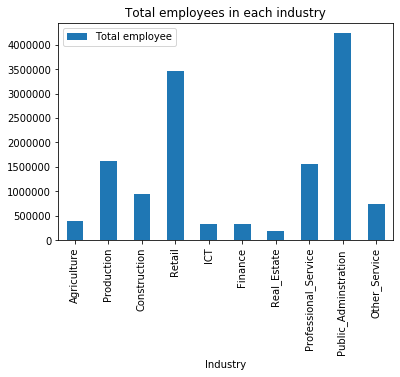

<IPython.core.display.Javascript object>

In [10]:
data.plot.bar(x="Industry", y="Total employee", align="center", alpha=1)
plt.title("Total employees in each industry")
plt.show()

From the visualization above we can see that **public administration** employed highest followed by **retail,, production, professional service and other service** industries consequently. **Agriculture, ICT, finance, and real estate** employed below **50000** total employees and **real estate** industry employed lowest over the years.

Next we want to have a look at the **overall growth** of the industries over the period. We will calculate the percent change over the years in each industry and sum it up to find the **overall growth**.

In [11]:
data = dataframe.copy()
data.set_index("Industry", inplace=True)
pctChange = data.pct_change(axis=1)
pctChange.reset_index(inplace=True)
pctChange

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Agriculture,NaN,0.013263,-0.054974,0.000000,0.019391,0.160326,-0.046838,0.061425,-0.069444,0.022388
1,Production,NaN,-0.044033,0.058745,-0.026482,0.063472,0.055420,-0.005770,-0.056878,0.016000,0.003634
2,Construction,NaN,-0.035197,-0.034335,0.014444,-0.021906,0.086226,-0.045361,0.109071,-0.115871,0.121145
3,Retail,NaN,-0.002606,-0.004064,0.012241,-0.006335,-0.022602,0.060480,0.006989,-0.074125,0.042279
4,ICT,NaN,0.003597,-0.053763,0.030303,-0.011029,0.327138,-0.327731,0.433333,0.712209,-0.465195
5,Finance,NaN,-0.118343,0.114094,-0.063253,0.041801,0.000000,-0.049383,0.006494,0.035484,0.105919
6,Real_Estate,NaN,0.081481,0.205479,0.068182,-0.042553,0.233333,-0.139640,0.188482,-0.198238,0.384615
7,Professional_Service,NaN,0.006906,-0.015089,-0.043872,0.091770,0.020013,0.086985,-0.030084,0.094293,0.060658
8,Public_Adminstration,NaN,0.007218,0.016722,-0.010808,0.014252,0.001405,-0.010290,-0.011106,0.014337,0.024499
9,Other_Service,NaN,0.059190,0.064706,0.005525,0.037088,-0.029139,0.053206,-0.062176,0.149171,-0.016827


<IPython.core.display.Javascript object>

                Industry  2009      2010      2011      2012      2013  \
0            Agriculture   NaN  0.013263 -0.054974  0.000000  0.019391   
1             Production   NaN -0.044033  0.058745 -0.026482  0.063472   
2           Construction   NaN -0.035197 -0.034335  0.014444 -0.021906   
3                 Retail   NaN -0.002606 -0.004064  0.012241 -0.006335   
4                    ICT   NaN  0.003597 -0.053763  0.030303 -0.011029   
5                Finance   NaN -0.118343  0.114094 -0.063253  0.041801   
6            Real_Estate   NaN  0.081481  0.205479  0.068182 -0.042553   
7   Professional_Service   NaN  0.006906 -0.015089 -0.043872  0.091770   
8  Public_Adminstration    NaN  0.007218  0.016722 -0.010808  0.014252   
9          Other_Service   NaN  0.059190  0.064706  0.005525  0.037088   

       2014      2015      2016      2017      2018  Overall Growth  
0  0.160326 -0.046838  0.061425 -0.069444  0.022388        0.105536  
1  0.055420 -0.005770 -0.056878  0.016000  0.

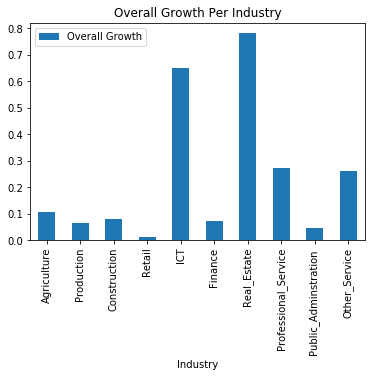

<IPython.core.display.Javascript object>

In [12]:
growth = []
columns = pctChange["Industry"][:]
for column in columns:
    gr = float(pctChange.loc[pctChange["Industry"] == column].sum(axis=1))
    growth.append(gr)
pctChange["Overall Growth"] = growth
print(pctChange)
pctChange.plot.bar(
    x="Industry",
    y="Overall Growth",
    title="Overall Growth Per Industry",
    align="center",
    alpha=1,
)
plt.show()

We can see that even though **real estate** industry employed the lowest employees over the years but this industry is the highest growing industry right after **ICT** industry. The **real estate** and **retal** industries changed **$2.34\%$** and **$1.95\%$** respectively.  **Professional service and other service** are the next two industries with the growth rate of **$0.81 \%$** and **$0.78\%$** respectively and having **$0.04 \%$** growth rate the **retail** industry is lowest growing. **Agricluture, construction, finance, production and public administration** have growth rate **$0.32\%, .23\%, .22\%, 0.19\% $** and **$0.14\%$** respectively.

Now we will look at the specific years and find out the **best and worst performing year in relation to employmnet**. We will take the year wise sum to get the total employment number for a year.

In [13]:
data = dataframe.copy()
employment_number = [data[year].sum() for year in years_]
en_dict = dict(zip(years_, employment_number))
en_dict

{'2009': 1336100,
 '2010': 1330400,
 '2011': 1346600,
 '2012': 1337300,
 '2013': 1365100,
 '2014': 1394400,
 '2015': 1403800,
 '2016': 1408800,
 '2017': 1422900,
 '2018': 1452200}

<IPython.core.display.Javascript object>

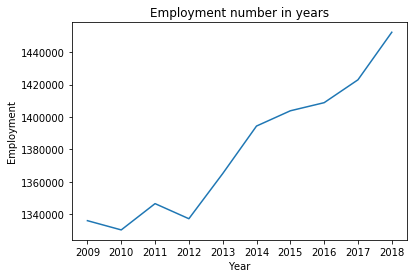

<IPython.core.display.Javascript object>

In [14]:
plt.plot(years_, employment_number)
plt.title("Employment number in years")
plt.xlabel("Year")
plt.ylabel("Employment")
plt.show()

We can clearly see that **2010** is the **worst performing year** and **2018** is the **best performing year** over the years in terms of number of employment. The total employment number was increasing and decreasing from 2009 to 2012. But after 2012 the total employment in Wales is increasing every year. The rate of increase was high from 2012 to 2014 and from 2016 to 2018. In the middle from 2014 to 2016 the increase in employment number was moderate.

# Visual Analysis

[Plotly Express](https://plotly.com/python/plotly-express/) is a great tool for creating dynamic visualizations for a dataset. In this section we will create such kind fo dynamic **scatter/bubble plot** showing the change of workforce number over the period using Plotly express. To do this we will make some changes in our dataframe first.

In [15]:
data = dataframe.copy()

yearstacked = []
industries = []
column_lst = []
k = 0

for i in range(len(industries_)):
    for j in range(len(data["Industry"])):
        yearstacked.append(years_[k])
        industries.append(industries_[j])
    k += 1

for year in years_:
    tmp = data[year]
    for i in tmp:
        column_lst.append(i)

tuples = list(zip(yearstacked, industries, column_lst))
plotly_dataframe = pd.DataFrame(tuples, columns=["Years", "Industry", "Employment"])

<IPython.core.display.Javascript object>

In [16]:
fig = px.scatter(
    plotly_dataframe,
    x="Industry",
    y="Employment",
    animation_frame="Years",
    size="Employment",
    color="Industry",
)
fig.show()

<IPython.core.display.Javascript object>

Here we can easily visualize the change of workforce number in different industries over the period. To demonstrate the change of workforce number in a single year we will make another dynamic plot.

In [17]:
data = dataframe.copy()
industrystacked = []
years = []
row_list = []
k = 0

for i in range(len(years_)):
    for j in range(len(data["Industry"])):
        industrystacked.append(data["Industry"][k])
        years.append(int(years_[j]))
    k += 1

# Iterate over each row
for i in range((data.shape[0])):
    row = list(data.iloc[i, 1:])
    for j in range(len(row)):
        row_list.append(row[j])


tuples = list(zip(industrystacked, years, row_list))
plotly_dataframe = pd.DataFrame(tuples, columns=["Industry", "Years", "Employment"])

<IPython.core.display.Javascript object>

In [18]:
fig = px.scatter(
    plotly_dataframe,
    x="Years",
    y="Employment",
    animation_frame="Years",
    animation_group="Industry",
    color="Industry",
    hover_name="Employment",
    size="Employment",
    log_x=True,
    size_max=15,
    range_x=[2008, 2019],
    range_y=[0, 500000],
)
fig.show()

<IPython.core.display.Javascript object>

# PCA/Correlation

In this section, we will undertake a **principal component analysis** in our dataset and will produce a **scatter plot** to better demonstrate the PCA results. PCA is important for tasks like dimensionality reduction.

In [19]:
data = dataframe.copy()
x = data.loc[:, years_].values

<IPython.core.display.Javascript object>

Since PCA yields a feature subspace that maximizes the variance along the axes and since our dataframe consists of data that are in different scales we will standardize the data first.
Although, all features(years) in our dataset were measured in numbers, we will continue the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [20]:
x = StandardScaler().fit_transform(x)
pd.DataFrame(data=x, columns=years_).head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,-0.722944,-0.712345,-0.734524,-0.730311,-0.739850,-0.731262,-0.732126,-0.729848,-0.785431,-0.769321
1,0.174046,0.125885,0.178414,0.154620,0.205460,0.255949,0.234445,0.161541,0.175489,0.151322
2,-0.278972,-0.299239,-0.332831,-0.317393,-0.350299,-0.320806,-0.350933,-0.285274,-0.396139,-0.320821
3,1.596417,1.588280,1.553410,1.597587,1.547741,1.495632,1.596163,1.638720,1.471078,1.495344
4,-0.797568,-0.789708,-0.806813,-0.796886,-0.813308,-0.784175,-0.854783,-0.795600,-0.641563,-0.840254


<IPython.core.display.Javascript object>

In [21]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=["PC 1", "PC 2"])
pca_dataframe = pd.concat([data[["Industry"]], principalDf], axis=1)
pca_dataframe.head(5)

,Industry,PC 1,PC 2
0,Agriculture,-2.336228,-0.062033
1,Production,0.574654,0.007002
2,Construction,-1.028544,-0.068697
3,Retail,4.927032,-0.121161
4,ICT,-2.504829,0.084791


<IPython.core.display.Javascript object>

We now have a dataframe containing industry names and two principal component values. Next, we will display **an array as a matrix** in a new figure window and produce a **scatter plot** from this data frame. 

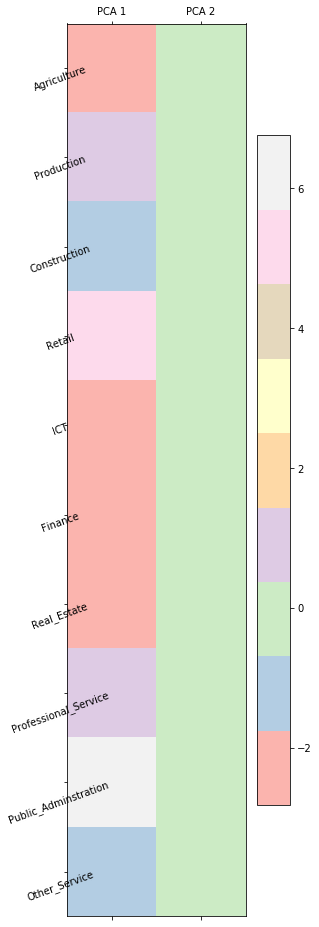

<IPython.core.display.Javascript object>

In [22]:
plt.matshow(principalComponents, cmap="Pastel1")
plt.colorbar()
plt.yticks(range(len(industries_)), industries_, ha="center", rotation="20")
plt.xticks([0, 1], ["PCA 1", "PCA 2"])
plt.show()

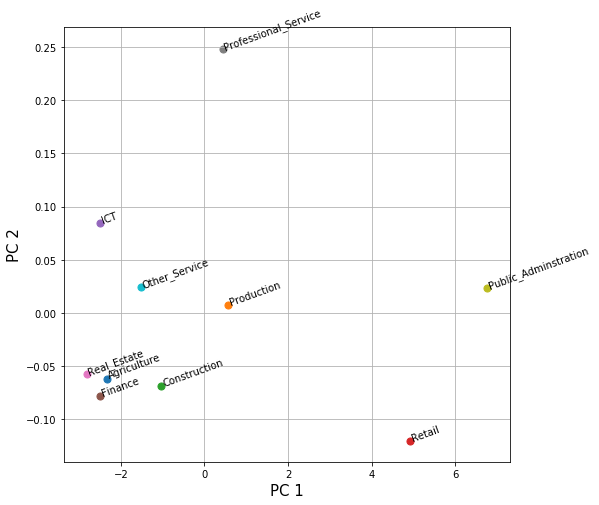

<IPython.core.display.Javascript object>

In [23]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("PC 1", fontsize=15)
ax.set_ylabel("PC 2", fontsize=15)
# ax.set_title("PCA", fontsize=20)
ind = data["Industry"]

for target in industries_:
    indicesToKeep = pca_dataframe["Industry"] == target
    ax.scatter(
        pca_dataframe.loc[indicesToKeep, "PC 1"],
        pca_dataframe.loc[indicesToKeep, "PC 2"],
        cmap="summer",
        s=50,
    )


for i, txt in enumerate(industries_):
    plt.annotate(
        txt, (pca_dataframe.loc[i, "PC 1"], pca_dataframe.loc[i, "PC 2"]), rotation=20,
    )
# ax.legend(industries_)
ax.grid()

In [24]:
pca.explained_variance_ratio_

array([0.99808273, 0.00102919])

<IPython.core.display.Javascript object>

The **explained variance** parameter gives us the amount of information that can be attributed to each of the principal components. we can see that the first two principal components contain 99.9% of the information. The first principal component contains 99.8% of the variance and the second principal component contains .1% of the variance.

From data analysis part we can see that industries with higher employees have contributed more of the PC 1 variance. **Real estate, agriculture and finance** industries had less than 500000 total employees over the yeears and they are clustered together in PCA. **ICT** also had less than 500000 employees over the years and contains simillar PCA 1 variance. **Other service, construction** and **production, professional service** are in two PCA 1 cluster but in different PCA 2 cluster. **Public administration and retail** contain most variance since they have got the most number of employees over the years.

Now that we have undertaken a **PCA** analysis, we will make **a year wise correlation** for each industry and see if the aforementioned industries are also correlated over the years.

In [25]:
data = dataframe.copy()
data = data.set_index("Industry")
data = data.T
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

Industry,Agriculture,Production,Construction,Retail,ICT,Finance,Real_Estate,Professional_Service,Public_Adminstration,Other_Service
Industry,,,,,,,,,,
Agriculture,NaN,0.646564,0.727019,0.227534,0.378069,0.005239,0.668110,0.636513,0.194875,0.333264
Production,NaN,NaN,0.188308,0.028424,0.231710,0.225092,0.604355,0.560187,0.546657,0.577920
Construction,NaN,NaN,NaN,0.414382,0.010326,0.309157,0.598064,0.440657,0.080268,0.030656
Retail,NaN,NaN,NaN,NaN,0.551669,0.252533,0.232011,0.045887,0.258487,0.156339
ICT,NaN,NaN,NaN,NaN,NaN,0.042842,0.154186,0.503172,0.122228,0.543306
Finance,NaN,NaN,NaN,NaN,NaN,NaN,0.316411,0.388880,0.589635,0.242434
Real_Estate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622777,0.684273,0.617589
Professional_Service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.584972,0.800549
Public_Adminstration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.739090


<IPython.core.display.Javascript object>

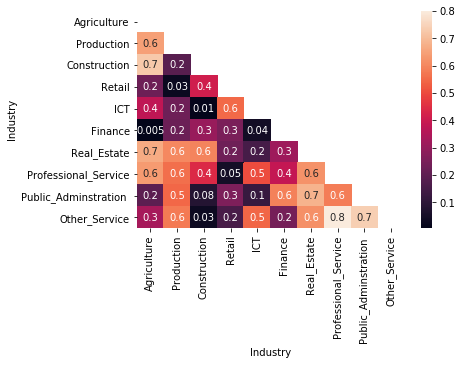

<IPython.core.display.Javascript object>

In [26]:
mask = np.triu(corr_matrix)
sns.heatmap(
    corr_matrix,
    xticklabels=corr_matrix.columns,
    yticklabels=corr_matrix.columns,
    annot=True,
    fmt=".1g",
    mask=mask,
)
plt.show()

Looking at the correaltion heatmap we can see that **agriculture, finance, ICT and real estate** are not correlated over the years. Also, rest of the industries that were correlated in PCA analysis are not correalated year wise indicating aforementioned industries have no cerrealtion over the years.

# Clustering (k means & hierarchical)

In this section, we will use the 2010 and 2018 data since they were **best and worst performing year** in relation to the employment from the data analysis part and use that data to find the relationships between industries. We will start with **K means** clustring. 

In [27]:
data = dataframe.copy()
data = data[["2010", "2018"]]
data = data.values.astype("float32", copy=False)
stscaler = preprocessing.StandardScaler().fit(data)
data = stscaler.transform(data)
kmeans = KMeans(n_clusters=2, max_iter=50, random_state=1)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>

In [28]:
clusters = pd.DataFrame(data=data)
clusters = pd.concat([dataframe[["Industry"]], clusters], axis=1)
clusters

,Industry,0,1
0,Agriculture,-0.712345,-0.769321
1,Production,0.125885,0.151322
2,Construction,-0.299239,-0.320821
3,Retail,1.588280,1.495344
4,ICT,-0.789708,-0.840254
5,Finance,-0.775438,-0.810698
6,Real_Estate,-0.889605,-0.886803
7,Professional_Service,0.095841,0.309443
8,Public_Adminstration,2.144846,2.140386
9,Other_Service,-0.488517,-0.468597


<IPython.core.display.Javascript object>

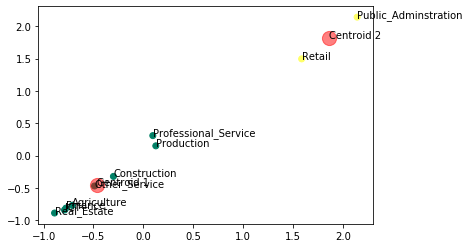

<IPython.core.display.Javascript object>

In [29]:
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap="summer")
for i, txt in enumerate(industries_):
    plt.annotate(
        txt, (data[:, 0][i], data[:, 1][i]),
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color="red",
    s=200,
    alpha=0.5,
)
for i, txt in enumerate(["Centroid 1", "Centroid 2"]):
    plt.annotate(
        txt, (kmeans.cluster_centers_[:, 0][i], kmeans.cluster_centers_[:, 1][i]),
    )
plt.rcParams["figure.figsize"] = (12, 10)
plt.show()

First, we have started with **(K = 2)** for our K means clustering. Industries that are related with each other will be in a single cluster and we have found two clusters. Public admininstration and retail industry are clustering together while professional service, construction, production, ICT, finance, real estate and other service industries are in another cluster.

Next, we will try with **(K = 3)** for our K means clustering.

In [30]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=1)
kmeans.fit(data)
print(data)

[[-0.712345   -0.76932114]
 [ 0.12588467  0.15132248]
 [-0.29923898 -0.3208214 ]
 [ 1.58828     1.4953439 ]
 [-0.7897085  -0.8402536 ]
 [-0.77543753 -0.8106984 ]
 [-0.88960505 -0.886803  ]
 [ 0.0958406   0.30944267]
 [ 2.1448464   2.1403856 ]
 [-0.48851666 -0.46859726]]


<IPython.core.display.Javascript object>

In [31]:
cluster_data = pd.DataFrame(data=data)
cluster_data = pd.concat([dataframe[["Industry"]], cluster_data], axis=1)
cluster_data

,Industry,0,1
0,Agriculture,-0.712345,-0.769321
1,Production,0.125885,0.151322
2,Construction,-0.299239,-0.320821
3,Retail,1.588280,1.495344
4,ICT,-0.789708,-0.840254
5,Finance,-0.775438,-0.810698
6,Real_Estate,-0.889605,-0.886803
7,Professional_Service,0.095841,0.309443
8,Public_Adminstration,2.144846,2.140386
9,Other_Service,-0.488517,-0.468597


<IPython.core.display.Javascript object>

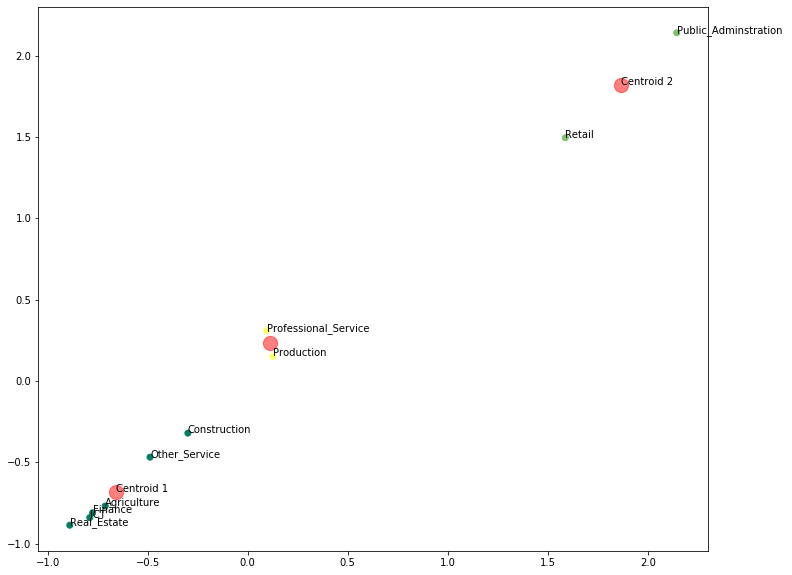

<IPython.core.display.Javascript object>

In [32]:
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap="summer")

for i, txt in enumerate(industries_):
    plt.annotate(
        txt, (data[:, 0][i], data[:, 1][i]),
    )


plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color="red",
    s=200,
    alpha=0.5,
)
for i, txt in enumerate(["Centroid 1", "Centroid 2"]):
    plt.annotate(
        txt, (kmeans.cluster_centers_[:, 0][i], kmeans.cluster_centers_[:, 1][i]),
    )
plt.rcParams["figure.figsize"] = (12, 10)
plt.show()

Increasing the clusters we found, like previously, **public administration and retail** are highly related in one cluster. **Agriculture, finance, construction, ICT, real estate and other service** are separated in another cluster and **production and professional service** are related in the middle cluster.

We can see that **(K = 3)** gives us better results by separating highly related industries more efficiently. 

Next we will apply **hierarchical clustering to the same 2010 and 2018 data (best & worst performing)** to see the difference.

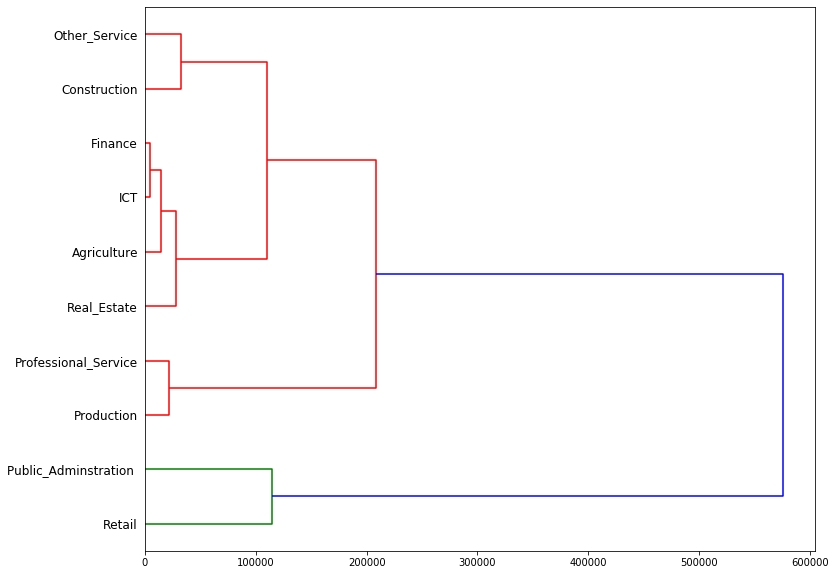

<IPython.core.display.Javascript object>

In [33]:
data = dataframe.copy()
data = data[["2010", "2018"]]
Z = hierarchy.linkage(data.values, "complete")
dendogram = hierarchy.dendrogram(Z, labels=industries_, orientation="right")

Hierarchical clustering builds the hirarchy of clusters as the name suggests. It divides the data into two clusters. Even though both the hierarchical and K means clustering gives quite simillar results, we need to keep in mind that:

1. Hierarchical clustering can't handle big data well compared to K Means clustering. Since time complexity of K Means is linear **$O(n)$** while it is quadratic **$O(n^2)$** for hierarchical clustering.

2. The results from K Means clustering can differ but the result are reproducible in hierarchical clustering.

3. We need prior knowledge of **K** for K Means clustering. But wwe can find number of clusters that are appropriate in hierarchical clustering by interpreting the dendogram.

4. K Means generally works well when the shape of data is hyper-spherical.


# Discussion

We have collected Wales employment from 2009 to 2018 and created a dataset. We have analyzed the collected dataset and found that public administration is the biggest employer over the years followed by retail, production, and professional service industries. Real estate has employed the lowest number of employees over the years but this industry has shown the highest overall growth,**$2.34\%$**, over the years followed by ICT, professional service, and other service industries. Even though the retail industry has a high number of total employees but this industry is the least growing, **$0.04 \%$**, industry over the years. The professional service industry has a good number, 1565200, of employees while also maintaining a healthy overall growth **$0.81\%$** over the years. 

If we look at the employment number for specific years we can see that from 2009 to 2012 the total number of employees every year was not consistent and fluctuating in this time period. But from 2012 the total employment in Wales is increasing every year. The rate of increase was high in the period of 2012 to 2014 and from 2016 to 2018. In the middle of 2014 to 2016 the increase in employment number was moderate. In our analysis we have found that, 2018 is the best performing year and 2010 is the least performing year. In terms of correlated industries, **public administration and retail** are two of the biggest employers that are in the same cluster and highly related to each other. We have found that these industries contain most of the variance in the dataset. **Agriculture, finance, construction, ICT, real estate, and other service** industries are also related to each other while **production and professional service** are also related industries. Industries that were highly related in PCA analysis were not correlated year wise. 

Overall, from the analysis we have found that the number of employment in Wales is increasing every year, and public administration, retail industries are leading the way. The real estate industry is growing fast and the professional service industry is also growing while having a good amount of employees already.